# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d100/2f0bb04162655f0cba429b865292f31482e817e0b3ee9da0f40185d7.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **London, England, United Kingdom**, and the stations the data comes from are shown on the map below.

In [ ]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(100,'2f0bb04162655f0cba429b865292f31482e817e0b3ee9da0f40185d7')

In [28]:
%matplotlib inline
df = pd.read_csv('data/C2A2_data/BinnedCsvs_d100/2f0bb04162655f0cba429b865292f31482e817e0b3ee9da0f40185d7.csv', parse_dates=['Date'])
df['Element'] = df['Element'].astype('category')


# use this extra column to filter on and format nice for plotting
df['DayMonth'] = df['Date'].dt.strftime('%Y-%b %d')
df['DayMonth'] = df['DayMonth'].str.slice(5) 
df.tail()

,ID,Date,Element,Data_Value,DayMonth
67643,NLE00113736,2011-09-08,TMIN,144,Sep 08
67644,NLE00113670,2015-12-07,TMIN,88,Dec 07
67645,UKM00003740,2008-01-05,TMAX,67,Jan 05
67646,UKM00003740,2005-12-14,TMIN,13,Dec 14
67647,NLE00113736,2011-09-08,TMAX,175,Sep 08


In [30]:
# save the 2015 to a different dataframe, for use in scatter
start_date = '2015-01-01'

mask = (df['Date'] >= start_date)

dfsingle = df.loc[mask]
maxes = dfsingle.groupby('DayMonth')['Data_Value'].max()
mins = dfsingle.groupby('DayMonth')['Data_Value'].min()
dfmins = mins
dfmaxes = maxes
print(dfsingle.head())
print(dfmins.head())

             ID       Date Element  Data_Value DayMonth
2   UKM00003740 2015-05-21    TMIN          57   May 21
9   UKM00003257 2015-10-17    TMIN          63   Oct 17
29  UKM00003740 2015-08-18    TMAX         199   Aug 18
30  NLE00113736 2015-05-10    TMIN          93   May 10
54  UKM00003772 2015-12-03    TMAX         131   Dec 03
DayMonth
Apr 01    25
Apr 02     7
Apr 03    36
Apr 04    41
Apr 05    27
Name: Data_Value, dtype: int64


In [22]:

start_date = '2005-01-01'
end_date = '2014-12-31'
mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)

df = df.loc[mask]
maxes = df.groupby('DayMonth')['Data_Value'].max()
mins = df.groupby('DayMonth')['Data_Value'].min()

mins = mins.drop(labels=['Feb 29'])
maxes = maxes.drop(labels=['Feb 29'])



# need to sort thse DayMonths, as they are in aplhabetical not Date Order:
# convert to dataframe, we can then sort with a separate index as a datetime
mins = mins.to_frame()
maxes = maxes.to_frame()

# with a diff. index we can sort on datetime aspect:
mins['alt_index'] = pd.to_datetime(mins.index, format='%b %d')
mins = mins.sort_values(by='alt_index')
print(mins.head())

maxes['alt_index'] = pd.to_datetime(maxes.index, format='%b %d')
maxes = maxes.sort_values(by='alt_index')
print(maxes.head())


          Data_Value  alt_index
DayMonth                       
Jan 01           -34 1900-01-01
Jan 02           -43 1900-01-02
Jan 03           -69 1900-01-03
Jan 04           -76 1900-01-04
Jan 05           -80 1900-01-05
          Data_Value  alt_index
DayMonth                       
Jan 01           130 1900-01-01
Jan 02           113 1900-01-02
Jan 03           126 1900-01-03
Jan 04           117 1900-01-04
Jan 05           122 1900-01-05


<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, Jan 01 to Dec 31
Data columns (total 2 columns):
Data_Value    365 non-null int64
alt_index     365 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 8.6+ KB


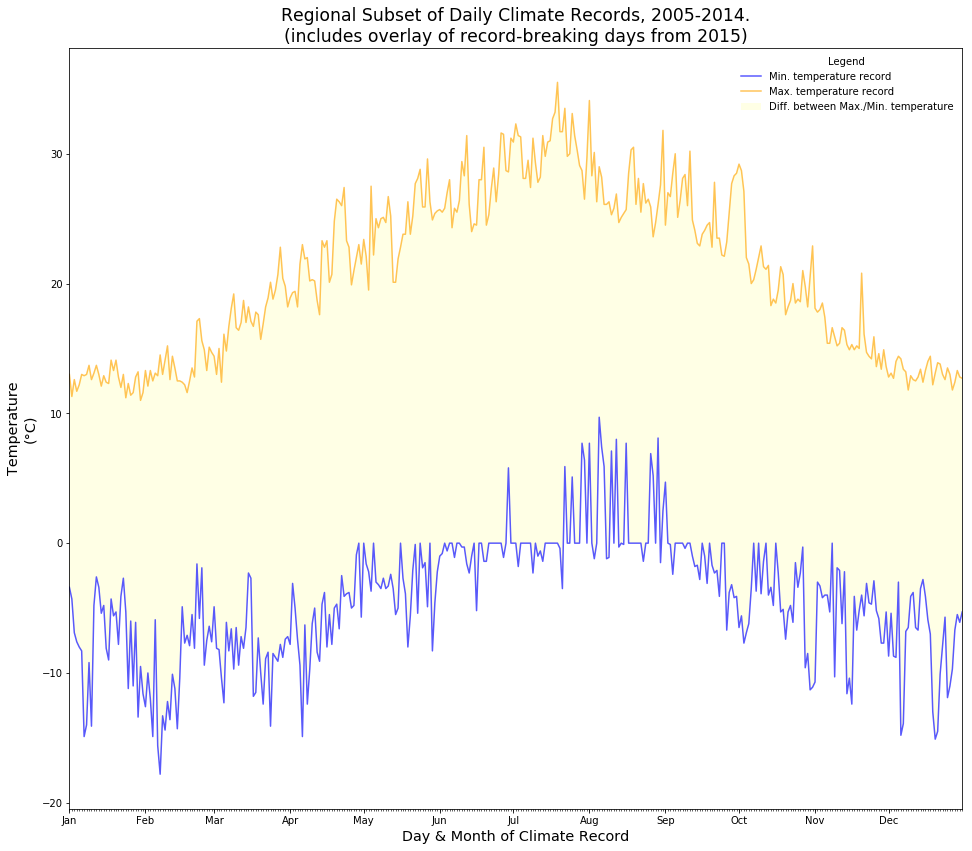

In [23]:
import datetime
import matplotlib.dates as mdates

# plot the datetime on the x axis in a matplotlib way!
# define scales of the dates
months = mdates.MonthLocator()
days = mdates.DayLocator()

# limit tick labels to month day
time_format = mdates.DateFormatter('%b')
fig, ax = plt.subplots(1,1,figsize=(16, 14))

plt.title('Regional Subset of Daily Climate Records, 2005-2014.\n' + \
          '(includes overlay of record-breaking days from 2015)', fontsize='xx-large')
plt.xlabel('Day & Month of Climate Record', fontsize='x-large')
plt.ylabel('Temperature\n(°C)', fontsize='x-large')

mintemps = mins['Data_Value']/10
maxtemps = maxes['Data_Value']/10
plt.plot(mins['alt_index'],mintemps, alpha=0.65,  c='blue')
plt.plot(maxes['alt_index'],maxtemps, alpha=0.65,  c='orange')

# shade in the area between max and min lines
plt.fill_between(mins['alt_index'].values, mintemps, maxtemps, facecolor='yellow', alpha=0.1)

# use scales from earlier to set ticks appropriately
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(time_format)
ax.xaxis.set_minor_locator(days)
plt.xlim([mins['alt_index'][0], mins['alt_index'][-1]])



# add a legend for the lines and scatter plot
plt.legend(['Min. temperature record', 'Max. temperature record', 'Diff. between Max./Min. temperature', 'Record-breaking temperatures in 2015'],\
           title='Legend', frameon=False)


mins.info()
